<img src = "https://imgur.com/HE0kDhA.jpg"  align = "center">

# **Variation of Overfitting and Underfitting Handling Techniques #1**

Ketika mengklasifikasikan dataset dengan menggunakan metode machine learning maupun deep learning, seringkali model yang dihasilkan mengalami kondisi underfit dan overfit. Apa itu? Di modul kali ini, kita akan berkenalan dengan kedua kondisi tersebut.




## **Underfit VS Overfit**

Tujuan dari machine learning adalah untuk membuat model yang dapat dengan tepat memprediksi (mengklasifikasikan) data test (atau data validation) ke dalam kelas yang tersedia. Akan tetapi, kadangkala model yang terbentuk masih belum mampu mengklasifikasikan data (baik itu data train, data validation, maupun data test) dengan akurat. Kondisi ini disebut dengan underfit. Setiap model yang dilatih, di epoch-epoch awal, biasanya masih akan mengalami kondisi underfit, tapi seiring meningkatnya nilai epoch, maka kondisi underfit lama-kelamaan akan hilang dan model akan berada pada kondisi best fit

![alt text](https://i.imgur.com/wbvAcgM.png)

Saat model mampu dengan sangat baik memprediksi data train, tapi kurang baik dalam memprediksi data validation atau data test, maka kondisi ini disebut dengan overfit. Ciri kondisi ini adalah grafik train loss menunjukkan tren turun (mendekati 0), sedangkan validation loss menunjukkan tren naik. Jadi ada generalitation gap di antara keduanya (seperti yang terlihat pada gambar di atas. Garis warna hijau adalah train loss, dan garis warna merah adalah validation loss).

Kemudian, bagaimana cara untuk menghindari overfitting pada suatu model? Ada banyak cara. Meskipun kita tidak bisa menjamin bahwa cara-cara tersebut 100% berhasil, tapi dari beberapa penelitian menunjukkan bahwa cara-cara tersebut cukup efektif dalam menekan kondisi overfit pada suatu model. Pada modul kali ini, kita akan berkenalan dengan 2 cara yang seringkali digunakan. Yaitu:

1.   Menambahkan Layer Batch Normalization
2.   Menambahkan Layer Dropout



### **Batch Normalization**

Secara umum, tujuan dari penambahan layer ini pada suatu arsitektur CNN adalah untuk menormalisasi output dari layer sebelumnya, untuk nanti diteruskan ke layer berikutnya. Dari beberapa penelitian yang telah dilakukan, terbukti penambahan layer ini mampu menekan kondisi overfit pada suatu model. Akan tetapi, penambahan layer ini memiliki kelemahan dimana proses training akan menjadi semakin lama, karena output dari suatu layer harus dinormalisasi terlebih dahulu, sebelum diteruskan ke layer berikutnya. Pada umumnya, layer ini ditambahkan setelah Activation Layer.

### **Droupout**

Secara sederhana, layer dropout berfungsi untuk menghilangkan edge (bobot) yang menghubungkan dua buah layer secara random. Seperti yang dapat dilihat pada gambar berikut:

![alt text](https://i.imgur.com/Lc8ZTIv.png)

Dapat dilihat pada gambar di atas, sebelah kiri adalah kondisi jaringan tanpa layer dropout. Sedangkan di sebelah kanan, adalah jaringan dengan layer Dropout. Pada jaringan di sebelah kiri, terdapat 12 buah bobot yang menghubungkan kedua layer. Sementara di sebelah kanan, dengan menambahkan layer dropout(50%), maka jumlah bobotnya berubah jadi 6 (50% dari 12). Dropout akan menghapus bobot yang menghubungkan kedua layer secara random dengan prosentase tertentu. Ini disebut konsep generalization dalam neural network. Tujuannya adalah agar model tidak terlalu presisi dalam mempelajari data train, sehingga melupakan hal-hal yang bersifat general. Penambahan layer dropout ini dari beberapa penelitian juga terbukti efektif dalam menekan kondisi overfit



---



---



## **Implementasi**

Pada sisi ini, kita akan mencoba memperbaiki model yang telah kita buat pada modul 2. Di modul sebelumnya, model CNN yang sudah kita bangun mampu memperoleh nilai akurasi 100% untuk data training. Akan tetapi untuk data validation, nilai akurasinya turun jadi 70%. Demikian pula nilai validation_loss yang semakin meningkat per epoch nya. Ini menandakan model yang terbentuk masih overfit. Kali ini, kita akan mencoba memperbaikinya dengan menambahkan layer dropout dan batch normalization

### **Load Dataset**

In [1]:
# Download dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-09-06 06:09:42--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.9.208, 172.217.12.240, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.9.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   149MB/s    in 0.4s    

2021-09-06 06:09:42 (149 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
# Ekstrak dataset

import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
# Definisikan path untuk data train dan data validation

base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [4]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [5]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

### **Data Preprocessing**

In [6]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (2000, 150, 150, 3)
Train Label =  (2000,)
Validation Data =  (1000, 150, 150, 3)
Validation Label =  (1000,)


In [7]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [255 255 255]
Data setelah di-normalisasi  [1. 1. 1.]


In [8]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['cats' 'cats' 'cats' 'cats' 'cats' 'dogs' 'dogs' 'dogs' 'dogs' 'dogs']
Label setelah di-encoder  [0 0 0 0 0 1 1 1 1 1]


## **Menambahkan Batch Normalization Layer pada model**

In [33]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout

### **Mendifinisikan Model**
Disini, kita akan menambahkan 3 buah layer BatchNormalization tiap di akhir layer convolution

In [10]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

In [11]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 64)        1

In [13]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### **Model Inference**

In [14]:
H = model.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
100/100 [==============================] - 61s 596ms/step - loss: 1.0623 - acc: 0.5690 - val_loss: 1.8645 - val_acc: 0.5090
Epoch 2/15
100/100 [==============================] - 59s 591ms/step - loss: 0.6054 - acc: 0.6550 - val_loss: 1.6651 - val_acc: 0.5650
Epoch 3/15
100/100 [==============================] - 59s 592ms/step - loss: 0.5055 - acc: 0.7420 - val_loss: 2.5443 - val_acc: 0.5390
Epoch 4/15
100/100 [==============================] - 59s 591ms/step - loss: 0.4230 - acc: 0.7900 - val_loss: 0.8724 - val_acc: 0.6160
Epoch 5/15
100/100 [==============================] - 59s 590ms/step - loss: 0.2872 - acc: 0.8735 - val_loss: 0.7047 - val_acc: 0.6640
Epoch 6/15
100/100 [==============================] - 59s 591ms/step - loss: 0.2039 - acc: 0.9175 - val_loss: 0.6405 - val_acc: 0.7380
Epoch 7/15
100/100 [==============================] - 59s 591ms/step - loss: 0.1040 - acc: 0.9605 - val_loss: 0.7964 - val_acc: 0.7150
Epoch 8/15
100/100 [==============================] - 5

### **Evaluasi**

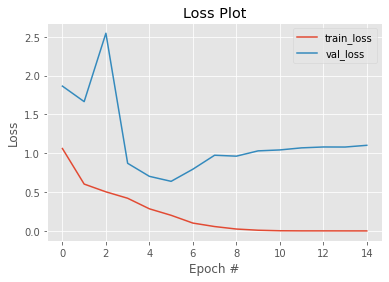

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
#plt.axis(0,15,0,8)
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

Grafik di atas menunjukkan masih terlihat adanya overfit. Akan tetapi jika dibandingkan dengan grafik loss pada **modul 2**, grafik loss kita menunjukkan generalization gap yang semakin kecil. Ini berarti BatchNormalization cukup baik dalam menekan keadaan overfit pada suatu model.

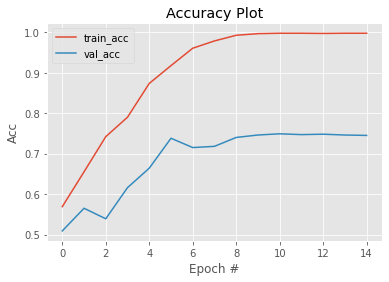

In [16]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 15), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       500
           1       0.75      0.74      0.74       500

    accuracy                           0.74      1000
   macro avg       0.75      0.74      0.74      1000
weighted avg       0.75      0.74      0.74      1000



## **Menambahkan Layer Dropout pada Model**

### **Mendefinikan Model**
Sekarang, dengan tetap menggunakan layer BatchNormalization, kita akan menambahkan layer Dropout pada arsitektur CNN kita. Ada 2 layer Dropout yang kita tambahkan. 1 layer di akhir proses feature extraction, dan 1 lagi di tengah-tengah fully connected layer.

In [18]:
# Feature Extraction Layer
model2 = Sequential()

model2.add(InputLayer(input_shape=[150,150,3]))
model2.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(Dropout(0.25))
model2.add(Flatten())

In [19]:
# Fully Connected Layer
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

In [20]:
# Print model summary
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
batch_normalization_3 (Batch (None, 150, 150, 16)      64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
batch_normalization_4 (Batch (None, 75, 75, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 38, 38, 64)       

In [21]:
# Compile model
model2.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### **Model Inference**

In [22]:
H2 = model2.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
100/100 [==============================] - 60s 595ms/step - loss: 1.5026 - acc: 0.5665 - val_loss: 1.5827 - val_acc: 0.5030
Epoch 2/15
100/100 [==============================] - 59s 594ms/step - loss: 0.6418 - acc: 0.6535 - val_loss: 1.0282 - val_acc: 0.5910
Epoch 3/15
100/100 [==============================] - 59s 593ms/step - loss: 0.5967 - acc: 0.6945 - val_loss: 0.9276 - val_acc: 0.6270
Epoch 4/15
100/100 [==============================] - 59s 592ms/step - loss: 0.5164 - acc: 0.7365 - val_loss: 0.6208 - val_acc: 0.6730
Epoch 5/15
100/100 [==============================] - 59s 592ms/step - loss: 0.4517 - acc: 0.7810 - val_loss: 0.8263 - val_acc: 0.7060
Epoch 6/15
100/100 [==============================] - 59s 592ms/step - loss: 0.4242 - acc: 0.8005 - val_loss: 0.5581 - val_acc: 0.7000
Epoch 7/15
100/100 [==============================] - 59s 593ms/step - loss: 0.3688 - acc: 0.8305 - val_loss: 0.7607 - val_acc: 0.7090
Epoch 8/15
100/100 [==============================] - 5

### **Evaluasi**

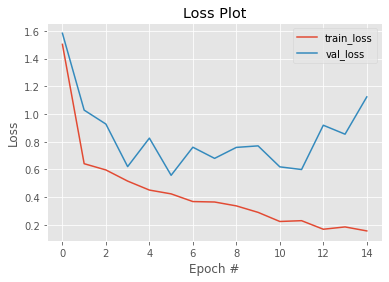

In [23]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H2.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H2.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

Disini terlihat penambahan layer dropout mampu menekan keadaan overfit lebih baik lagi (jika dibandingkan dengan grafik loss yang sebelumnya). Terlihat bahwa setiap kali garis loss validation akan naik, maka layer dropout akan menekannya untuk kembali turun. Sehingga rata-rata generalization gap dapat terjaga. Memang penggunaan batch normalization dan dropout terlihat tidak cukup untuk menghilangkan overfit pada kasus kita, tapi paling tidak, kondisinya sudah jauh lebih baik daripada sebelumnya. Di modul berikutnya, kita akan mempelajari teknik-teknik lain untuk menekan kondisi overfit tersebut.

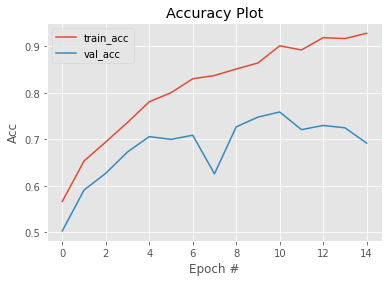

In [24]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H2.history["acc"], label="train_acc")
plt.plot(np.arange(0, 15), H2.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [25]:
pred2 = model2.predict(x_val)
labels2 = (pred2 > 0.5).astype(np.int)

print(classification_report(y_val, labels2))

              precision    recall  f1-score   support

           0       0.66      0.81      0.72       500
           1       0.75      0.57      0.65       500

    accuracy                           0.69      1000
   macro avg       0.70      0.69      0.69      1000
weighted avg       0.70      0.69      0.69      1000



## **Save and Load Model**

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
model.save('drive/MyDrive/MLModule/BatchNormModel.h5')
model2.save('drive/MyDrive/MLModule/DropoutModel.h5')

## **Make Prediction**

Model : BatchNormModel.h5
Predicted Label : cat
Probability : 0.0

Model : DropoutModel.h5
Predicted Label : cat
Probability : 0.0116



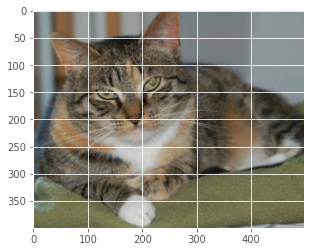

In [43]:
from PIL import Image

img_upload = Image.open("drive/MyDrive/MLModule/cat.2007.jpg")
img_plt = plt.imshow(img_upload)
img = np.array(img_upload)
img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)

model_list = ['drive/MyDrive/MLModule/BatchNormModel.h5','drive/MyDrive/MLModule/DropoutModel.h5']
labels = ['cat', 'dog']

for m in model_list:
    model = load_model(m)
    size_img = model.layers[0].output_shape[1:3]
    imgs = cv2.resize(img, size_img)
    imgs = imgs.astype('float32') / 255
    pred = model.predict(np.expand_dims(imgs, axis=0))[0]
    print('Model :', m.split('/')[-1])
    print('Predicted Label :',labels[((pred > 0.5)+0).ravel()[0]])
    print('Probability :',[ round(elem, 4) for elem in pred ][0])
    print('===============\n')